<a href="https://colab.research.google.com/github/srijanparia/Real_Estate_Price_Prediction_Project/blob/main/Real_Estate_Price_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read Data

In [ ]:
df = pd.read_csv("/content/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

Data Cleaning

In [ ]:
df1 = df.drop(["area_type",'availability','society','balcony'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-10-eadc3504d97e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [ ]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
df2 = df2.drop(['size'],axis='columns')

In [ ]:
df2.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [ ]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def isFloat(x):
  try:
    float(x)
  except:
    return False
  return True

In [ ]:
df2[~df2['total_sqft'].apply(isFloat)]
df2.head(10)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
5,Whitefield,1170,2.0,38.00,2
6,Old Airport Road,2732,4.0,204.00,4
7,Rajaji Nagar,3300,4.0,600.00,4
8,Marathahalli,1310,3.0,63.25,3
9,Gandhi Bazar,1020,6.0,370.00,6


In [ ]:
def convert_saft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens [0])+float(tokens [1]))/2
  try:
    return float (x)
  except:
    return None

In [ ]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_saft_to_num)
df3.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [ ]:
df4 = df3.copy()
df4['price_per_sqft'] = (df4['price'] * 100000 )/ df4['total_sqft']
df4.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [ ]:
name_of_loc = df4['location'].unique()

In [ ]:
len(name_of_loc)

1304

In [ ]:
df4['location'] = df4['location'].apply(lambda x: x.strip())
loc_stat = df4.groupby('location')['location'].agg('count')
loc_stat.sort_values(ascending = False)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [ ]:
loc_stat_less_than_10 = loc_stat[loc_stat<=10]

In [ ]:
len(loc_stat_less_than_10)

1052

In [ ]:
df4['location'] = df4['location'].apply(lambda x: 'Other' if x in loc_stat_less_than_10 else x)
df4.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,Other,1020.0,6.0,370.00,6,36274.509804


In [ ]:
df4[df4.total_sqft/df4.bhk<300]

,location,total_sqft,bath,price,bhk,price_per_sqft
9,Other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,Other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13277,Other,1400.0,7.0,218.0,7,15571.428571
13279,Other,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


In [ ]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]

In [ ]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
def remove_pps_outliers(df) :
  df_out = pd.DataFrame ( )
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[ (subdf.price_per_sqft> (m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat ([df_out, reduced_df],ignore_index=True)
  return df_out

df6 = remove_pps_outliers(df5)

In [ ]:
df6.shape

(10241, 6)

In [ ]:
def remove_bhk_outliers(df) :
  exclude_indices = np.array ([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats [bhk] = {
        'mean': np. mean (bhk_df.price_per_sqft),
        'std': np.std(bhk_df.price_per_sqft),
        'count': bhk_df. shape [0]
      }
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get (bhk-1)
      if stats and stats ['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop (exclude_indices, axis='index')

In [ ]:
df7 = remove_bhk_outliers(df6)
df7

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...
10230,Yeshwanthpur,1195.0,2.0,100.0,2,8368.200837
10231,Yeshwanthpur,1692.0,3.0,108.0,3,6382.978723
10233,Yeshwanthpur,2500.0,5.0,185.0,6,7400.000000
10238,Yeshwanthpur,1855.0,3.0,135.0,3,7277.628032


Text(0, 0.5, 'Count')

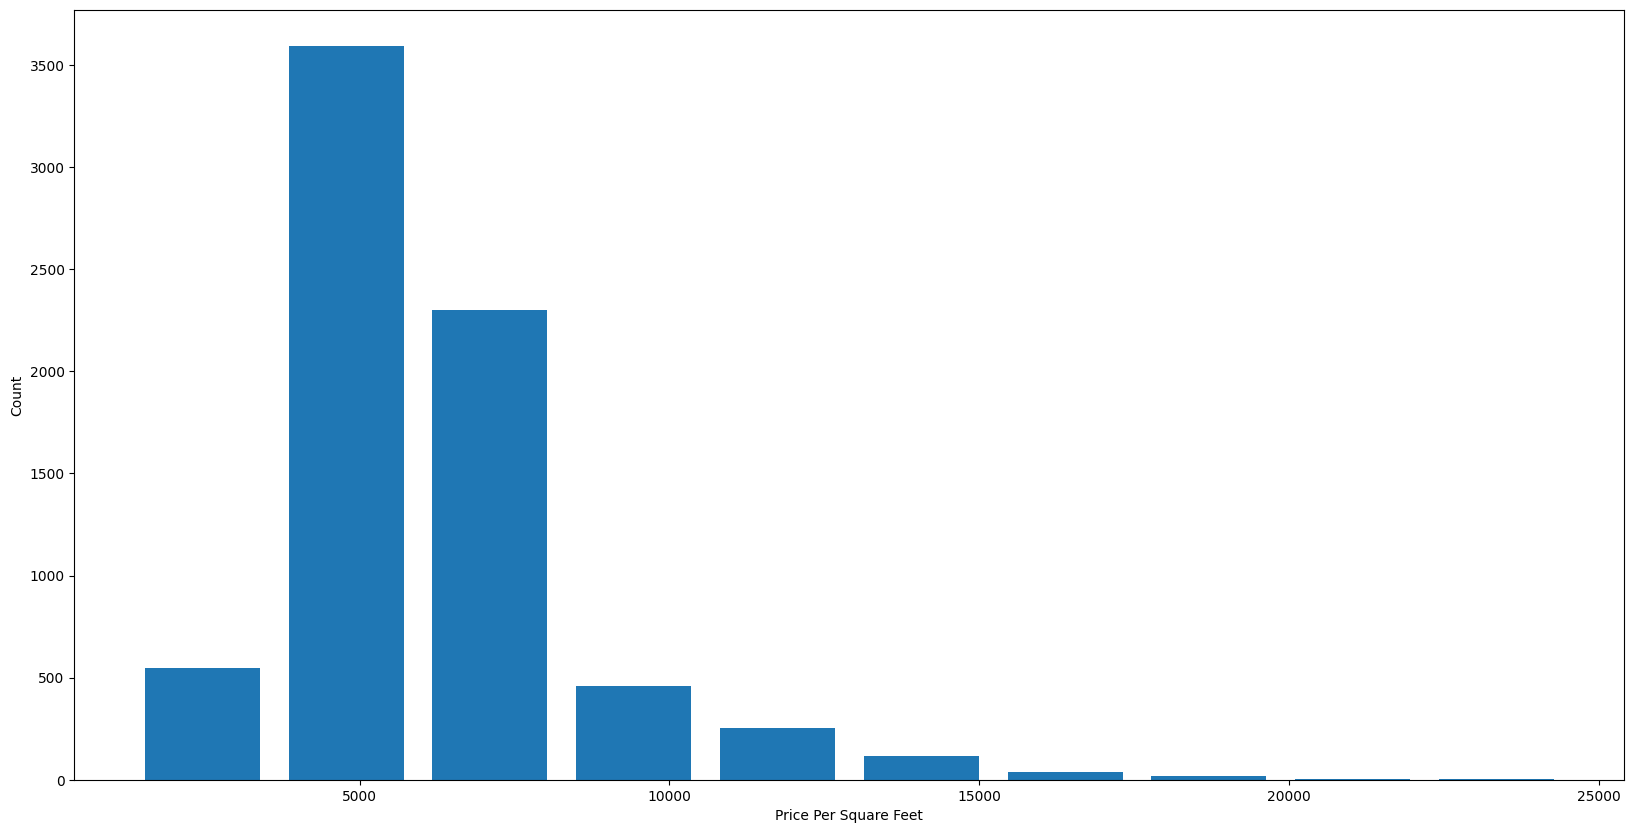

In [ ]:
plt.hist(df7.price_per_sqft, rwidth=0.8)
plt.xlabel( "Price Per Square Feet")
plt.ylabel( "Count")

In [ ]:
df7[~(df7.bath>df7.bhk+2)]

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...
10230,Yeshwanthpur,1195.0,2.0,100.0,2,8368.200837
10231,Yeshwanthpur,1692.0,3.0,108.0,3,6382.978723
10233,Yeshwanthpur,2500.0,5.0,185.0,6,7400.000000
10238,Yeshwanthpur,1855.0,3.0,135.0,3,7277.628032


In [ ]:
df8 = df7.drop(['price_per_sqft'],axis='columns')

In [ ]:
df8

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10230,Yeshwanthpur,1195.0,2.0,100.0,2
10231,Yeshwanthpur,1692.0,3.0,108.0,3
10233,Yeshwanthpur,2500.0,5.0,185.0,6
10238,Yeshwanthpur,1855.0,3.0,135.0,3


**Building Model**

In [ ]:
dummies = pd.get_dummies(df8.location)
dummies.drop(['Other'],axis='columns')

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df9 = pd.concat([df8,dummies],axis='columns')
df10 = df9.drop(['location'],axis='columns')
df10

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,1195.0,2.0,100.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10231,1692.0,3.0,108.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,2500.0,5.0,185.0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,1855.0,3.0,135.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
x = df10.drop(['price'],axis='columns')

In [ ]:
y=df10.price

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression ()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8372778837561048

In [ ]:
from sklearn. model_selection import ShuffleSplit, cross_val_score
cv = ShuffleSplit (n_splits=5, test_size=0.2, random_state=0)
cross_val_score (LinearRegression(), x, y, cv=cv)

array([0.86826574, 0.84359489, 0.85336421, 0.81213116, 0.8453399 ])

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor



In [ ]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,linear_regression,0.845129,{'fit_intercept': False}
1,lasso,0.705037,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.722942,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [ ]:
from pandas.core.arrays.arrow import array
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(x.columns==location)[0][0]

    arr = np.zeros(len(x.columns))
    arr[0] = sqft
    arr[1] = bath
    arr[2] = bhk
    if loc_index >= 0:
        arr[loc_index] = 1

    return lr_clf.predict([arr])[0]

In [ ]:
predict_price ('1st Phase JP Nagar', 1000, 2, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


73.67243957519531

In [ ]:
predict_price('Indira Nagar', 1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


143.08025360107422

In [ ]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))